In [1]:
from quantum_dataset import QM7, QM7b, QM7X, QM9, ANI1, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=200, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'simple'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=200, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=100, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

loading QM9 datadic from a pickled copy...
<class 'quantum_dataset.QM9'> dataset created...
epoch: 0 of 50, train loss: 121.61052678858192, val loss: 25.755175417119805
epoch: 5 of 50, train loss: 20.33690792842976, val loss: 18.832873647863213
epoch: 10 of 50, train loss: 13.263560966380592, val loss: 13.640440724112771
epoch: 15 of 50, train loss: 11.205653644302517, val loss: 11.099953738125889
epoch: 20 of 50, train loss: 10.09283069499488, val loss: 9.677586512132125
epoch: 25 of 50, train loss: 9.593014744878973, val loss: 9.960555466738613
epoch: 30 of 50, train loss: 9.319943853952353, val loss: 9.14916198903864
epoch: 35 of 50, train loss: 9.165592749141952, val loss: 9.086821729486639
epoch: 40 of 50, train loss: 9.046980871737581, val loss: 9.042300267653031
epoch: 45 of 50, train loss: 8.956285893338398, val loss: 8.98786822232333
test loss: 8.824645538330078
y_pred:
tensor([[-460.3392],
        [-472.3936],
        [-445.3058],
        [-468.6797],
        [-472.3131],
   

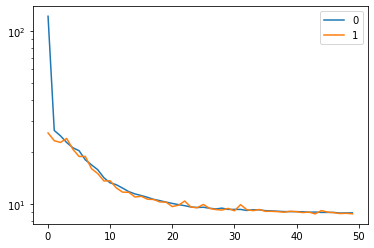

learning time: 0:02:57.753893


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb'], 
             'target': 'U0',
             'pad': 29,
             'use_pickle': True}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=512, epochs=50, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}
sample_params = {'split': .1, 'subset': False}

Learn(Dataset=Champs, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=True, load_model=False)

In [ ]:
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': False,
             'use_h5': False,  
             'infer': True}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20201021_2101.pth', adapt=False)

In [ ]:
ds_params = {'features': 
                 ['atomic_numbers', 'ccsd(t)_cbs.energy', 'coordinates', 'hf_dz.energy',
                  'hf_qz.energy', 'hf_tz.energy', 'mp2_dz.corr_energy', 'mp2_qz.corr_energy',
                  'mp2_tz.corr_energy', 'npno_ccsd(t)_dz.corr_energy', 'npno_ccsd(t)_tz.corr_energy',
                  'tpno_ccsd(t)_dz.corr_energy', 'wb97x_dz.cm5_charges', 'wb97x_dz.dipole', 
                  'wb97x_dz.energy', 'wb97x_dz.forces', 'wb97x_dz.hirshfeld_charges', 
                  'wb97x_dz.quadrupole', 'wb97x_tz.dipole', 'wb97x_tz.energy', 'wb97x_tz.forces',
                  'wb97x_tz.mbis_charges', 'wb97x_tz.mbis_dipoles', 'wb97x_tz.mbis_octupoles',
                  'wb97x_tz.mbis_quadrupoles', 'wb97x_tz.mbis_volumes'],
            'target': ['wb97x_dz.energy'], 
             'pad': None, 
             'in_file': './data/ani1/ani1x-release.h5'}

ani1 = ANI1(**ds_params)

In [ ]:
ds_params = {'features': [],
            'target': [], 
             'pad': None, 
             'in_file': './data/ani1/ani1x-release.h5'}

ani1 = ANI1(**ds_params)

In [ ]:
sorted(list(ani1.ds_idx))[:10]

In [ ]:
ani1.datadic['C10H14O1']

In [ ]:
for k in ani1.datadic['C1H4'].keys():
    print(k, ani1.datadic['C1H4'][k].shape)

In [ ]:
for k in ani1.datadic['C10H10'].keys():
    print(k, ani1.datadic['C10H10'][k].shape)

In [ ]:
ani1.datadic['C10H10'].keys()

In [ ]:
X, _, y = ani1['C10H10']

In [ ]:
X[:1000]

In [ ]:
ds_params = {'n': 133885, 
             'features': ['A','B','C','mu','alpha','homo','lumo', 
                          'gap','r2','zpve','U0','U','H','G','Cv'], 
             'target': 'U0',
             'dim': 10,
             'use_pickle': True}

qm9 = QM9(**ds_params)

In [ ]:
qm9.datadic[6].xyz

In [ ]:
qm9.datadic[6].adjacency

In [ ]:
qm9.datadic[6].in_file

In [ ]:
qm9[6]

In [ ]:
ds_params = {'features': ['DIP','atNUM'],
             'dim': 100,
             'target': ['atXYZ'],
             'selector': ['i1-c1-opt']}

qm7x = QM7X(**ds_params)

In [ ]:
qm7x[6]

In [ ]:
ds_params = {'features': ['DIP','HLgap','KSE','atC6','atNUM','atPOL','atXYZ', 
            'eC','eDFTB+MBD','eEE','eH','eKIN','eKSE','eL','eMBD','eNE', 
            'eNN','ePBE0','ePBE0+MBD','eTS','eX','eXC','eXX','hCHG', 
            'hDIP','hRAT','hVDIP','hVOL','mC6','mPOL','mTPOL','pbe0FOR', 
            'sMIT','sRMSD','totFOR','vDIP','vEQ','vIQ','vTQ','vdwFOR','vdwR'],
             'dim': 1024,
             'target': ['eAT'],
             'selector': ['i1-c1-opt']}

opt_params = {'lr': 0.001}

model_params = {'D_in': 1024, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

crit_params = {'reduction': 'sum'}

sample_params = {'split': .1, 'subset': False}

Learn(Dataset=QM7X, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=256, epochs=50, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)
